In this notebook an **artificial neural network** has been developed on Churn_modelling dataset and breast cancer winscosin data

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
# for confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**Churn_modelling** dataset

# Data Preprocessing

In [3]:
dataset = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data<br>
Label Encoding **Gender** column

In [5]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

# One Hot Encoding the "Geography" column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Feature Scaling

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the ANN

In [8]:
# initializing ANN
ann = tf.keras.models.Sequential()

In [9]:
# adding input and hidden layer to first layer 
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# adding input and hidden layer to second layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [10]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compiling

ann.fit(X_train, y_train, batch_size = 32, epochs = 100) # train ANN

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4994 - acc: 0.7946
Epoch 2/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4479 - acc: 0.8108
Epoch 3/100
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4240 - acc: 0.8216
Epoch 4/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4127 - acc: 0.8239
Epoch 5/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4054 - acc: 0.8248
Epoch 6/100
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4002 - acc: 0.8284
Epoch 7/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.3962 - acc: 0.8286
Epoch 8/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.3921 - acc: 0.8295
Epoch 9/100
8000/8000 [==============================] - 0s 22us/sample 

## Making prediction

In [11]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Evaluation

## Confusion Matrix

Confusion matrix, without normalization
[[1500   95]
 [ 190  215]]


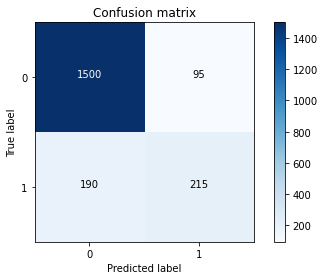

In [12]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])
plt.show()

## Accuracy score

In [13]:
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.8575


**Breast cancer winscosin dataset**

# Step 1

In [14]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
X = data.iloc[:, 2:-1].values
Y = data.iloc[:, 1].values

# Step 2

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


# Step 3

In [17]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(Y)

# Step 4

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Step 5

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Step 6

In [20]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [21]:
# initialising ANN
classifier = Sequential()

In [22]:
# add input layer and first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 30, units = 16, kernel_initializer = "uniform"))

# add dropout to prevent over fitting
classifier.add(Dropout(rate = 0.1))

# Practical 1

In [23]:
# adding second hidden layer
classifier.add(Dense(activation = "relu", units = 16, kernel_initializer = "uniform"))

# adding dropout
classifier.add(Dropout(rate = 0.1))

In [24]:
# adding output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

In [25]:
# compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Practical 2

In [26]:
classifier.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
398/398 [==============================] - 0s 473us/step - loss: 0.6928 - accuracy: 0.5578
Epoch 2/10
398/398 [==============================] - 0s 13us/step - loss: 0.6914 - accuracy: 0.6457
Epoch 3/10
398/398 [==============================] - 0s 15us/step - loss: 0.6897 - accuracy: 0.6533
Epoch 4/10
398/398 [==============================] - 0s 15us/step - loss: 0.6875 - accuracy: 0.6734
Epoch 5/10
398/398 [==============================] - 0s 13us/step - loss: 0.6844 - accuracy: 0.7010
Epoch 6/10
398/398 [==============================] - 0s 13us/step - loss: 0.6799 - accuracy: 0.7412
Epoch 7/10
398/398 [==============================] - 0s 15us/step - loss: 0.6738 - accuracy: 0.8015
Epoch 8/10
398/398 [==============================] - 0s 13us/step - loss: 0.6661 - accuracy: 0.8543
Epoch 9/10
398/398 [==============================] - 0s 15us/step - loss: 0.6560 - accuracy: 0.8869
Epoch 10/10
398/398 [==============================] - 0s 13us/step - loss: 0.6420 - accur

In [27]:
# predicting test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Confusion matrix, without normalization
[[103   5]
 [  9  54]]


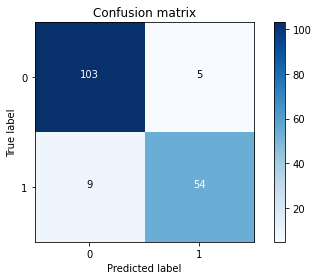

In [28]:
# making confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [29]:
# accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9181286549707602


# Practical 3

In [30]:
classifier.fit(X_train, y_train, batch_size = 100, epochs = 50)

Epoch 1/50
398/398 [==============================] - 0s 13us/step - loss: 0.6265 - accuracy: 0.9271
Epoch 2/50
398/398 [==============================] - 0s 15us/step - loss: 0.6069 - accuracy: 0.9296
Epoch 3/50
398/398 [==============================] - 0s 13us/step - loss: 0.5831 - accuracy: 0.9397
Epoch 4/50
398/398 [==============================] - 0s 12us/step - loss: 0.5556 - accuracy: 0.9397
Epoch 5/50
398/398 [==============================] - 0s 13us/step - loss: 0.5249 - accuracy: 0.9422
Epoch 6/50
398/398 [==============================] - 0s 13us/step - loss: 0.4927 - accuracy: 0.9422
Epoch 7/50
398/398 [==============================] - 0s 15us/step - loss: 0.4574 - accuracy: 0.9497
Epoch 8/50
398/398 [==============================] - 0s 13us/step - loss: 0.4207 - accuracy: 0.9497
Epoch 9/50
398/398 [==============================] - 0s 13us/step - loss: 0.3866 - accuracy: 0.9497
Epoch 10/50
398/398 [==============================] - 0s 15us/step - loss: 0.3513 - accura

In [31]:
# predicting test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Confusion matrix, without normalization
[[104   4]
 [  2  61]]


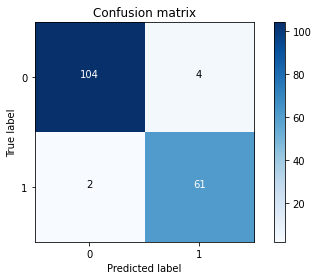

In [32]:
# making confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [33]:
# accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544


# Practical 4

In [34]:
classifier.fit(X_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
398/398 [==============================] - 0s 15us/step - loss: 0.0674 - accuracy: 0.9824
Epoch 2/100
398/398 [==============================] - 0s 18us/step - loss: 0.0692 - accuracy: 0.9849
Epoch 3/100
398/398 [==============================] - 0s 15us/step - loss: 0.0703 - accuracy: 0.9874
Epoch 4/100
398/398 [==============================] - 0s 15us/step - loss: 0.0669 - accuracy: 0.9849
Epoch 5/100
398/398 [==============================] - 0s 15us/step - loss: 0.0635 - accuracy: 0.9849
Epoch 6/100
398/398 [==============================] - 0s 10us/step - loss: 0.0688 - accuracy: 0.9824
Epoch 7/100
398/398 [==============================] - 0s 15us/step - loss: 0.0599 - accuracy: 0.9849
Epoch 8/100
398/398 [==============================] - 0s 13us/step - loss: 0.0636 - accuracy: 0.9824
Epoch 9/100
398/398 [==============================] - 0s 15us/step - loss: 0.0690 - accuracy: 0.9849
Epoch 10/100
398/398 [==============================] - 0s 13us/step - loss: 0.067

In [35]:
# predicting test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Confusion matrix, without normalization
[[104   4]
 [  3  60]]


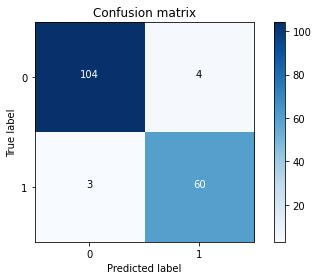

In [36]:
# making confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [37]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9590643274853801
